<a href="https://colab.research.google.com/github/Shoriful-islam-prince/210127_CNN_implementation/blob/main/210127_CNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Clone the GitHub repository


In [ ]:
!git clone https://github.com/Shoriful-islam-prince/210127_CNN_implementation.git


fatal: destination path '210127_CNN_implementation' already exists and is not an empty directory.


In [ ]:
%cd 210127_CNN_implementation


/content/210127_CNN_implementation


In [ ]:
!ls


custom	data  dataset-4


In [ ]:
!ls custom


airplane.jpg	bird.jpg  deer.jpg  frog.jpg   ship.jpg
automobile.jpg	cat.jpg   dog.jpg   horse.jpg  truck.jpg


In [ ]:

import torch
import torchvision
import matplotlib
import seaborn
import sklearn
import PIL

print("All required libraries are available.")


All required libraries are available.


In [ ]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)


PyTorch version: 2.9.0+cpu
Torchvision version: 0.24.0+cpu


In [ ]:
#Enable GPU
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)



Using device: cpu


2.Imports & Configuration

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns


3. Dataset Definition (CIFAR-10 Subset)

In [ ]:
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]



4. Data Preprocessing (STRICTLY torchvision.transforms)

In [ ]:

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2470, 0.2435, 0.2616]
    )
])


5. Automatic Dataset Download

In [ ]:

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)



6. DataLoaders

In [ ]:
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader  = DataLoader(testset, batch_size=64, shuffle=False)


7. CNN Model (From Scratch – Mandatory)


In [ ]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(256*4*4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim



In [ ]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(256*4*4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")




In [ ]:
model = ImprovedCNN().to(device)

total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)


Total parameters: 2474506


8. Training Configuration

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2470, 0.2435, 0.2616]
    )
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)



In [ ]:
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader  = DataLoader(testset, batch_size=64, shuffle=False)


In [ ]:
print(len(trainloader))


782


In [ ]:
model = ImprovedCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10


9. Training Loop (Loss + Accuracy Tracking)

In [ ]:

train_losses, train_accs = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = outputs.argmax(dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_acc = correct / total

    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{epochs}] Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}")




Epoch [1/10] Loss: 1.1465, Acc: 0.5889
Epoch [2/10] Loss: 0.9497, Acc: 0.6710
Epoch [3/10] Loss: 0.8281, Acc: 0.7128
Epoch [4/10] Loss: 0.7345, Acc: 0.7449
Epoch [5/10] Loss: 0.6523, Acc: 0.7723
Epoch [6/10] Loss: 0.5832, Acc: 0.7979
Epoch [7/10] Loss: 0.5136, Acc: 0.8235
Epoch [8/10] Loss: 0.4576, Acc: 0.8412
Epoch [9/10] Loss: 0.4048, Acc: 0.8599
Epoch [10/10] Loss: 0.3543, Acc: 0.8765


10. Save Model (MANDATORY)

In [ ]:


os.makedirs("model", exist_ok=True)
torch.save(model.state_dict(), "model/cnn_cifar10.pth")

11. Training History Plots

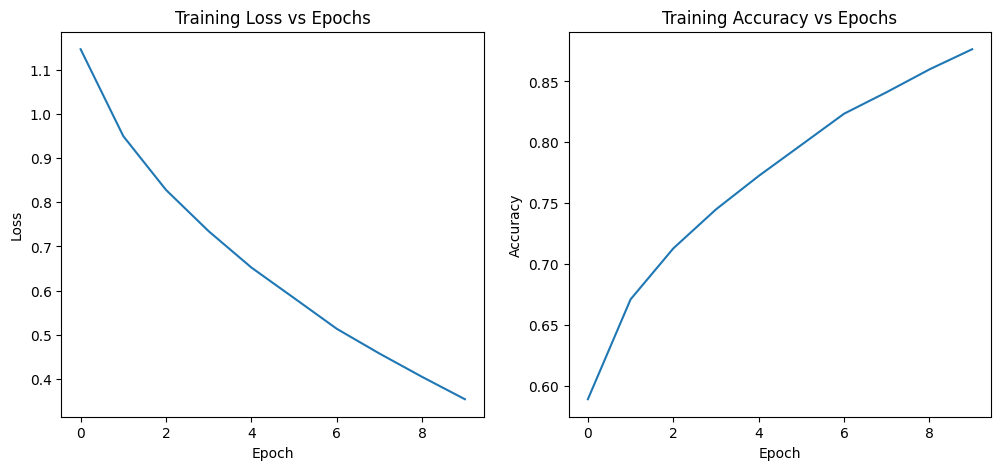

In [ ]:


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses)
plt.title("Training Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(train_accs)
plt.title("Training Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()


12. Evaluation on CIFAR-10 Test Set

In [ ]:

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


13. Confusion Matrix

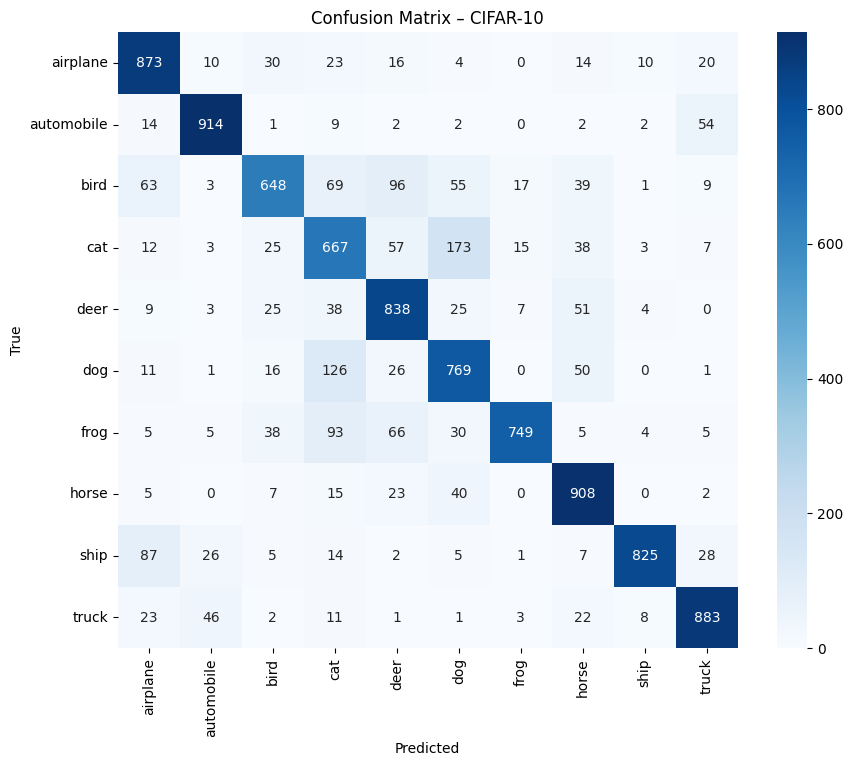

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=classes,
            yticklabels=classes,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – CIFAR-10")
plt.show()



14. Custom Smartphone Image Prediction (REAL-WORLD TESTING)

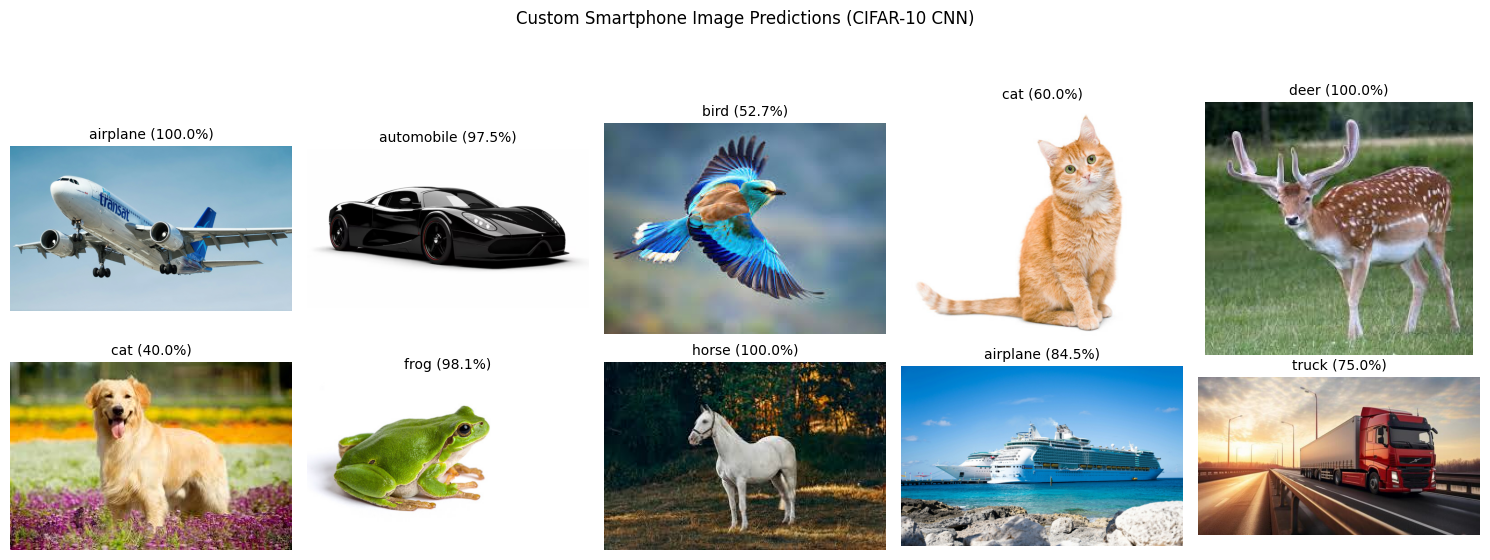

In [ ]:


custom_dir = "custom"
images = sorted(os.listdir(custom_dir))  # keep order stable

model.eval()
plt.figure(figsize=(15, 6))

for i, img_name in enumerate(images):
    img_path = os.path.join(custom_dir, img_name)
    img = Image.open(img_path).convert("RGB")

    img_t = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_t)
        probs = torch.softmax(output, dim=1)
        conf, pred = torch.max(probs, 1)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(
        f"{classes[pred.item()]} ({conf.item()*100:.1f}%)",
        fontsize=10
    )
    plt.axis("off")

plt.suptitle("Custom Smartphone Image Predictions (CIFAR-10 CNN)")
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()



15. Visual Error Analysis (3 Misclassified Samples)

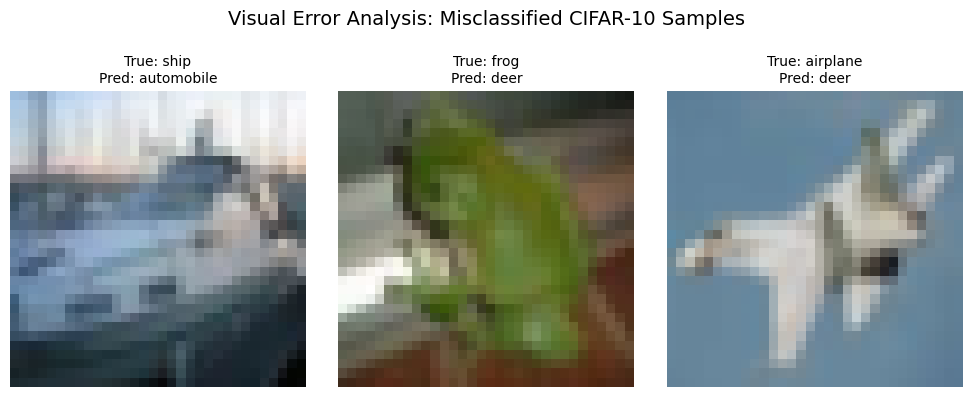

In [ ]:
incorrect = []

model.eval()
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        for img, true_label, pred_label in zip(images, labels, preds):
            if true_label != pred_label:
                incorrect.append(
                    (img.cpu(), true_label.item(), pred_label.item())
                )

            if len(incorrect) == 3:
                break

        if len(incorrect) == 3:
            break

plt.figure(figsize=(10, 4))

mean = torch.tensor([0.4914, 0.4822, 0.4465])
std  = torch.tensor([0.2470, 0.2435, 0.2616])

for i, (img, true_cls, pred_cls) in enumerate(incorrect):
    plt.subplot(1, 3, i + 1)

    img = img.permute(1, 2, 0)
    img = img * std + mean
    img = img.clamp(0, 1)

    plt.imshow(img)
    plt.title(f"True: {classes[true_cls]}\nPred: {classes[pred_cls]}", fontsize=10)
    plt.axis("off")

plt.suptitle("Visual Error Analysis: Misclassified CIFAR-10 Samples", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()
